In [1]:
import xarray as xr
from matplotlib import pyplot as plt
from matplotlib import colors
%matplotlib inline 
import pandas as pd
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from matplotlib import rcParams
from cycler import cycler
from statsmodels.tsa.stattools import adfuller, kpss


In [2]:
rcParams['figure.figsize'] = 24, 8
rcParams['lines.linewidth'] = 1

In [3]:
f = xr.open_dataarray("TS_cmems_reanalysis_temperature_from1987to2019_AdriaticSea.nc")

In [4]:
fy_dt = f.groupby('time.month').mean()
fy_dt

<xarray.DataArray 'thetao' (month: 12)>
array([14.533921 , 13.794261 , 13.8592615, 15.053479 , 18.20389  ,
       22.295887 , 25.222841 , 26.325382 , 24.487059 , 21.706154 ,
       18.808342 , 16.213816 ], dtype=float32)
Coordinates:
    depth    float32 ...
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [5]:
df = f.to_dataframe()
df.head()



,depth,thetao
time,,
1987-01-01 12:00:00,1.018237,14.696689
1987-01-02 12:00:00,1.018237,14.670896
1987-01-03 12:00:00,1.018237,14.636758
1987-01-04 12:00:00,1.018237,14.561996
1987-01-05 12:00:00,1.018237,14.448793


In [6]:
fyy_dt = df.groupby(pd.Grouper(freq='M')).mean()
fyy_dt

,depth,thetao
time,,
1987-01-31,1.018237,13.864359
1987-02-28,1.018237,13.179310
1987-03-31,1.018237,12.894018
1987-04-30,1.018237,14.141104
1987-05-31,1.018237,16.465521
...,...,...
2019-08-31,1.018237,27.158361
2019-09-30,1.018237,25.771572
2019-10-31,1.018237,23.038315


In [7]:
fyy_dt.shape

(396, 2)

Text(0.5, 1.0, 'TS cmems reanalysis temperature from1987to2019 AdriaticSea\nMonthly Group=each year has 12 points')

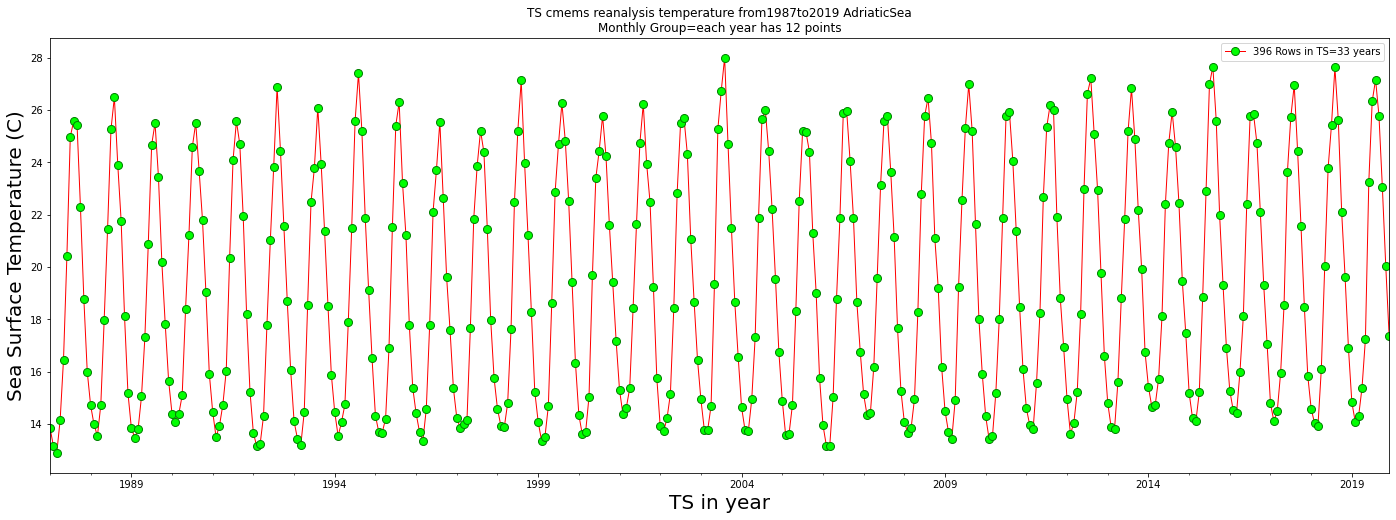

In [8]:

title = "TS cmems reanalysis temperature from1987to2019 AdriaticSea\nMonthly Group=each year has 12 points"
fyy_dt.thetao.plot(color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8, label='396 Rows in TS=33 years')
plt.legend();
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)
plt.xlabel('TS in year',fontsize=20)
plt.title(title)

In [9]:
roller_m = fyy_dt.rolling(window = 12,center=True)
roller_m

Rolling [window=12,center=True,axis=0,method=single]

In [10]:
roller_mm=roller_m.mean()
roller_mm

,depth,thetao
time,,
1987-01-31,NaN,NaN
1987-02-28,NaN,NaN
1987-03-31,NaN,NaN
1987-04-30,NaN,NaN
1987-05-31,NaN,NaN
...,...,...
2019-08-31,NaN,NaN
2019-09-30,NaN,NaN
2019-10-31,NaN,NaN


In [11]:
roller_mm.size

792

Text(0.5, 1.0, 'TS cmems reanalysis temperature from1987to2019 AdriaticSea\nRolling=12')

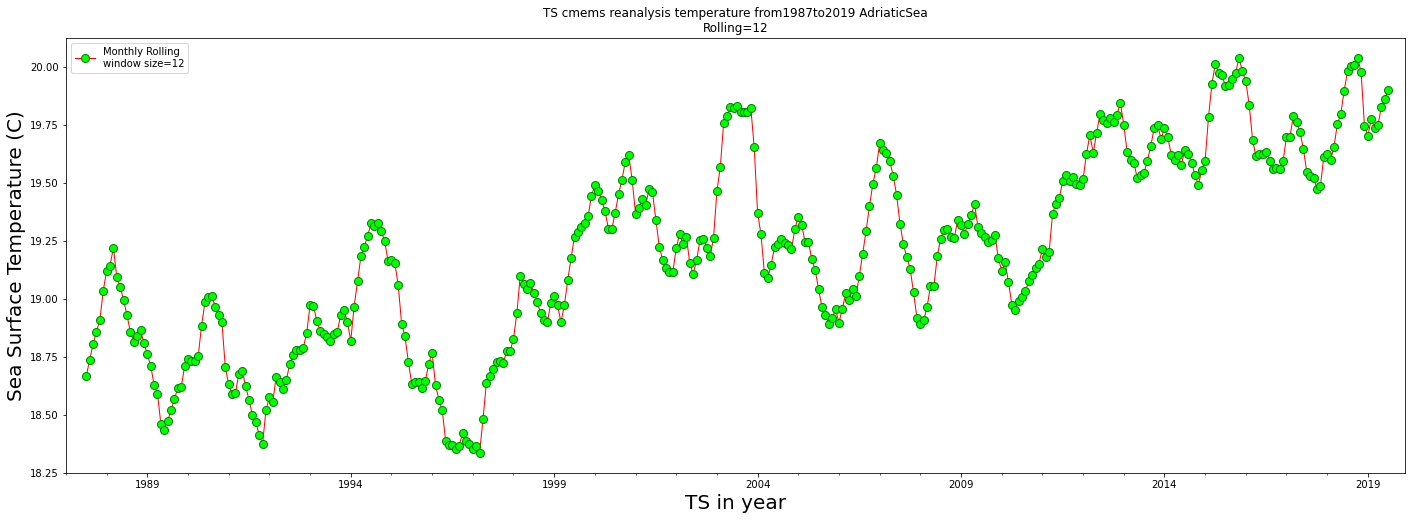

In [12]:
roller_mm.thetao.plot(color='red', marker='o', markerfacecolor='lime', markeredgecolor='g', markersize=8,label='Monthly Rolling\nwindow size=12')
plt.legend()
title = "TS cmems reanalysis temperature from1987to2019 AdriaticSea\nRolling=12"
plt.ylabel('Sea Surface Temperature (C)',fontsize=20)
plt.xlabel('TS in year',fontsize=20)
plt.title(title)